### Curve Fitting Part 1

In [1]:
# Set up configuration options and special features
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

def dinput(input_text) :
    return int(input(input_text))

def finput(input_text) :
    return float(input(input_text))

def ainput(input_prompt) :
    '''
    Function to convert user input of a list or tuple of values to a numpy array.
    Input format can be like "1,2" or "[1,2]" or "(1,2)" etc
    '''
    return(array(eval(input(input_prompt))))

In [2]:
def pollsf(x, y, sigma, M):
    """Function to fit a polynomial to data
       Inputs 
        x       Independent variable
        y       Dependent variable
        sigma   Estimate error in y
        M       Number of parameters used to fit data
       Outputs
        a_fit   Fit parameters; a(1) is intercept, a(2) is slope
        sig_a   Estimated error in the parameters a()
        yy      Curve fit to the data
        chisqr  Chi squared statistic
    """

    #* Form the vector b and design matrix A   
    N = len(x)
    b = empty(N)
    A = empty((N,M))
    #print(A)
    for i in range(N):
        b[i] = y[i]/sigma[i]
        for j in range(M):
            A[i,j] = x[i]**(j) / sigma[i]

    #* Compute the correlation matrix C 
    C = inv( transpose(A) @ A )

    #* Compute the least squares polynomial coefficients a_fit
    a_fit = C @ ( transpose(A) @ transpose(b) ) 

    #* Compute the estimated error bars for the coefficients
    sig_a = empty(M)
    for j in range(M):
        sig_a[j] = sqrt(C[j,j])

    #* Evaluate curve fit at each data point and compute Chi^2
    yy = zeros(N)
    chisqr = 0
    for i in range(N):
        for j in range(M):
            
            yy[i] += a_fit[j]*x[i]**(j)  # yy is the curve fit
      
        chisqr += ((y[i]-yy[i]) / sigma[i])**2
        
        
    return [a_fit, sig_a, yy, chisqr]

## Part 1.1 (a) and (b)
Fitting polynomial of order M-1 to curve_data.txt 

Fit parameters:
a[0] = 4.96883 +/- 0.25249
a[1] = -1.54193 +/- 0.13106
a[2] = 0.17842 +/- 0.01400
polyval best-fit parameters:  [ 0.17841876 -1.54192636  4.96882672]
parameter uncertainties:  [0.17231618 1.61290291 3.1073193 ]
Chi-square: 757.2923463552024


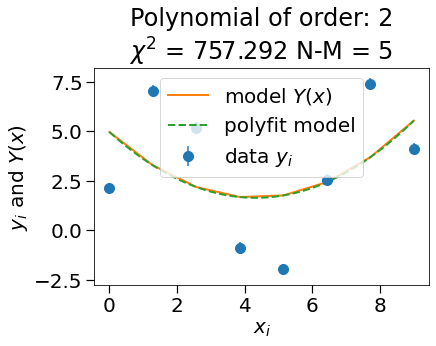

Fit parameters:
a[0] = 4.06333 +/- 0.28364
a[1] = 0.30259 +/- 0.29409
a[2] = -0.36935 +/- 0.07943
a[3] = 0.04058 +/- 0.00579
polyval best-fit parameters:  [ 0.0405751  -0.36934515  0.30258615  4.06333329]
parameter uncertainties:  [0.07706263 1.05689602 3.91324852 3.77420559]
Chi-square: 708.2091120226977


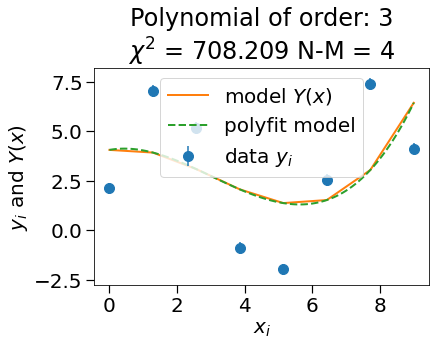

Fit parameters:
a[0] = 1.86048 +/- 0.29600
a[1] = 12.01028 +/- 0.53732
a[2] = -7.11160 +/- 0.27088
a[3] = 1.24977 +/- 0.04681
a[4] = -0.06718 +/- 0.00258
polyval best-fit parameters:  [-0.06717774  1.24977446 -7.11159759 12.01028402  1.86048055]
parameter uncertainties:  [0.0082137  0.14899159 0.86226631 1.71042209 0.94222171]
Chi-square: 30.398788664158555


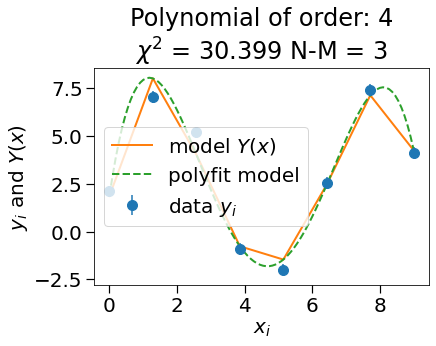

Fit parameters:
a[0] = 2.03822 +/- 0.29939
a[1] = 9.03557 +/- 0.92431
a[2] = -4.28928 +/- 0.76324
a[3] = 0.35778 +/- 0.23032
a[4] = 0.04664 +/- 0.02889
a[5] = -0.00506 +/- 0.00128
polyval best-fit parameters:  [-5.05875231e-03  4.66441847e-02  3.57782123e-01 -4.28927706e+00
  9.03557079e+00  2.03821836e+00]
parameter uncertainties:  [0.00347386 0.0784755  0.62558762 2.07304794 2.51052699 0.81316903]
Chi-square: 14.754499200143716


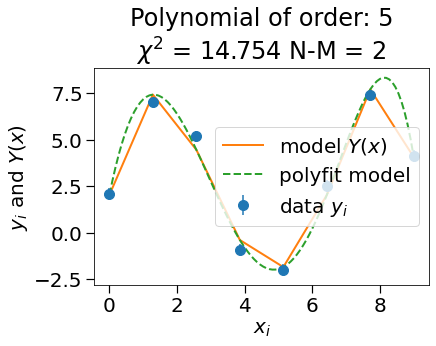

Fit parameters:
a[0] = 2.10636 +/- 0.29996
a[1] = 3.58238 +/- 1.74297
a[2] = 3.14998 +/- 2.15552
a[3] = -3.17671 +/- 0.98508
a[4] = 0.80300 +/- 0.20698
a[5] = -0.07972 +/- 0.02027
a[6] = 0.00277 +/- 0.00075
polyval best-fit parameters:  [ 2.76539678e-03 -7.97244655e-02  8.02997872e-01 -3.17671297e+00
  3.14997674e+00  3.58238039e+00  2.10635743e+00]
parameter uncertainties:  [7.98660015e-04 2.16068615e-02 2.20598418e-01 1.04988077e+00
 2.29733045e+00 1.85763089e+00 3.19689684e-01]
Chi-square: 1.1359031860727271


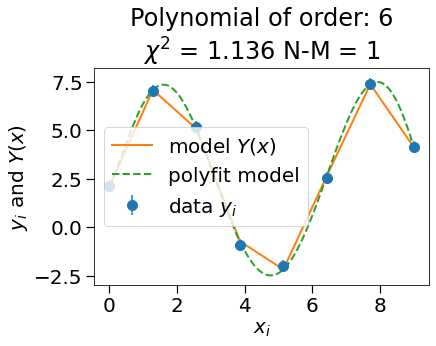

The Chi Square values of order [3, 4, 5, 6, 7]  are [757.2923463552024, 708.2091120226977, 30.398788664158555, 14.754499200143716, 1.1359031860727271]
The best fit polynomail is order 7


In [3]:
Mvals = [3,4,5,6,7] #Orders of polynomials. M = 3 is 2nd order
Chisquared=[]

for m in Mvals:
    
    #Use numpy loadtxt function to unpack x,y arrays. Skiprows = 1 removes string x,y,dy
    data = np.loadtxt("curve_data.txt", skiprows=1)
    #print("curve_data.txt: ",data)
    x = data[:,0] 
    y = data[:,1]
    dy = data[:,2]
    N = len(x)
    seed(0)           # Initialize random number generator  
    y += normal(0,dy) # add simulated measurement errors (Gaussian distributed random vector)

    #* Fit the data to a straight line or a more general polynomial
    M = m
    if M == 2 :  
        #* straight line fit
        [a_fit, sig_a, yy, chisqr] = linreg(x, y, dy)
    else: 
        #* Polynomial fit
        [a_fit, sig_a, yy, chisqr] = pollsf(x, y, dy, M)

    #* Print out the fit parameters, including their error bars.
    print('Fit parameters:')
    for i in range(M):
        print('a[%d] = %.5f +/- %.5f' % (i,a_fit[i],sig_a[i]))

    # Use built-in numpy function:
    deg = M - 1
    params, cov = polyfit(x,y,deg,w=1/dy,cov=True)
    dparams = sqrt( diag( cov ))
    print('polyval best-fit parameters: ', params)
    # variance in parameters from diagonal of covariance matrix:
    print('parameter uncertainties: ', dparams)
    print('Chi-square:', chisqr)
    Chisquared.append(chisqr) #record chisqr values in list

    # construct best-fitting model
    xmod = linspace(min(x),max(x),100)
    ymod = polyval(params,xmod)
    rcParams.update({'font.size': 20})
    #* Graph the data, with error bars, and fitting function.
    plt.figure()
    plt.errorbar(x,y,dy,fmt='o',ms=10,label='data $y_i$')   # Graph data with error bars
    plt.plot(x,yy,'-',lw=2,label='model $Y(x)$')            # Plot the fit on same graph as data
    plt.plot(xmod,ymod,'--',lw=2,label='polyfit model') # polyfit result
    #plt.title('Projectile Motion: ') + air_text)
    xlabel('$x_i$')  
    ylabel('$y_i$ and $Y(x)$')
    legend(loc='best')
    #speeds = r'$v_0$ = {0:.1f} '.format(speed)
    title('Polynomial of order: ' + str(M-1) + 
         '\n$\chi^2$ = ' + str(round(chisqr,3)) + ' N-M = ' + str(N-M))
    tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks
    plt.show()
print("The Chi Square values of order",Mvals," are",Chisquared)
print("The best fit polynomail is order", (Chisquared.index(min(Chisquared))+3))

## Part 1.1 (c) and (d)

Fitting the Sine Function

In [4]:
def linreg(x,y,sigma):
    """Function to perform linear regression (fit a line)
       Inputs
        x       Independent variable
        y       Dependent variable
        sigma   Estimated error in y
       Outputs
        a_fit   Fit parameters; a(1) is intercept, a(2) is slope
        sig_a   Estimated error in the parameters a()
        yy      Curve fit to the data
        chisqr  Chi squared statistic
    """
    
    #* Evaluate various sigma sums
    s = 0.; sx = 0.; sy = 0.; sxy = 0.; sxx = 0.
    for i in range(len(x)):
        sigmaTerm = sigma[i]**(-2)
        s += sigmaTerm              
        sx += x[i] * sigmaTerm
        sy += y[i] * sigmaTerm
        sxy += x[i] * y[i] * sigmaTerm
        sxx += x[i]**2 * sigmaTerm
    denom = s*sxx - sx**2

    #* Compute intercept a_fit(1) and slope a_fit(2)
    a_fit = np.empty(2)
    a_fit[0] = (sxx*sy - sx*sxy)/denom
    a_fit[1] = (s*sxy - sx*sy)/denom

    #* Compute error bars for intercept and slope
    sig_a = np.empty(2)
    sig_a[0] = np.sqrt(sxx/denom)
    sig_a[1] = np.sqrt(s/denom)

    #* Evaluate curve fit at each data point and compute Chi^2
    yy = np.empty(len(x))
    chisqr = 0.
    for i in range(len(x)):
        yy[i] = a_fit[0] + a_fit[1]*x[i]          # Curve fit to the data
        chisqr += ( (y[i]-yy[i])/sigma[i] )**2    # Chi square
    return [a_fit, sig_a, yy, chisqr]

[[ 0.      1.5826  0.3   ]
 [ 1.2857  6.9361  0.3   ]
 [ 2.5714  4.8991  0.3   ]
 [ 3.8571 -1.5914  0.3   ]
 [ 5.1429 -2.5532  0.3   ]
 [ 6.4286  2.8287  0.3   ]
 [ 7.7143  7.1324  0.3   ]
 [ 9.      4.1764  0.3   ]]
Fit parameters:
a[0] = 2.27378 +/- 0.11031
a[1] = 4.95447 +/- 0.16353
polyval best-fit parameters:  [4.95446729 2.27378078]
parameter uncertainties:  [0.1483169  0.10004382]
Chi-square: 4.935410590084887


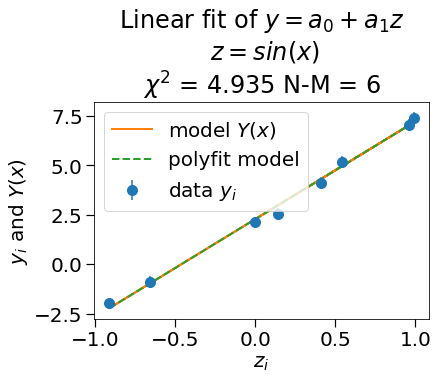

The polynomial better fits the data


In [5]:
data = np.loadtxt("curve_data.txt", skiprows=1)
print(data)
z = np.sin(data[:,0]) #Linearizes y = A + Csin(x) -> y = A + Cz ; z = sin(x)
y = data[:,1]
dy = data[:,2]
N = len(z) 
seed(0)           # Initialize random number generator
y += normal(0,dy) # add simulated measurement errors (Gaussian distributed random vector)

#* Fit the data to a straight line or a more general polynomial
M = 2
if M == 2 :  
    #* straight line fit
    [a_fit, sig_a, yy, chisqr] = linreg(z, y, dy)
else: 
    #* Polynomial fit
    [a_fit, sig_a, yy, chisqr] = pollsf(z, y, dy, M)

#* Print out the fit parameters, including their error bars.
print('Fit parameters:')
for i in range(M):
    print('a[%d] = %.5f +/- %.5f' % (i,a_fit[i],sig_a[i]))

# Use built-in numpy function:
deg = M - 1
params, cov = polyfit(z,y,deg,w=1/dy,cov=True)
dparams = sqrt( diag( cov ))
print('polyval best-fit parameters: ', params)
# variance in parameters from diagonal of covariance matrix:
print('parameter uncertainties: ', dparams)
print('Chi-square:', chisqr)


# construct best-fitting model
xmod = linspace(min(z),max(z),100)
ymod = polyval(params,xmod)
rcParams.update({'font.size': 20})
#* Graph the data, with error bars, and fitting function.
plt.figure()
plt.errorbar(z,y,dy,fmt='o',ms=10,label='data $y_i$')   # Graph data with error bars
plt.plot(z,yy,'-',lw=2,label='model $Y(x)$')            # Plot the fit on same graph as data
plt.plot(xmod,ymod,'--',lw=2,label='polyfit model') # polyfit result
#plt.title('Projectile Motion: ') + air_text)
xlabel('$z_i$')  
ylabel('$y_i$ and $Y(x)$')
legend(loc='best')
#speeds = r'$v_0$ = {0:.1f} '.format(speed)
title(r'Linear fit of $y=a_0 + a_1z$ '+
      '\n $z=sin(x)$'+ '\n$\chi^2$ = ' + str(round(chisqr,3)) + ' N-M = ' + str(N-M))
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks
plt.show()

if chisqr <= min(Chisquared):
    print('The sine function better fits the data.')
else:
    print('The polynomial better fits the data')

## Part 1.2 -- Dow Jones

Fit parameters:
a[0] = 2590.35956 +/- 10.48809
a[1] = -59.95225 +/- 3.16228
polyval best-fit parameters:  [ -59.95225272 2590.35955562]
parameter uncertainties:  [13.30206639 44.11796315]
Chi-square: 53.08349105854544


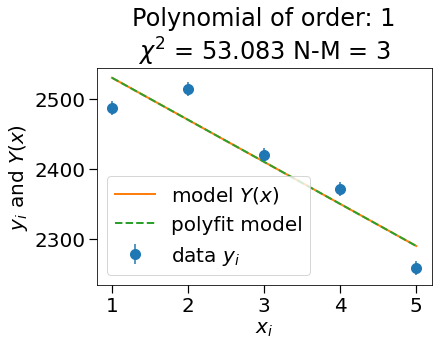

Fit parameters:
a[0] = 2473.68303 +/- 21.44761
a[1] = 40.05620 +/- 16.34451
a[2] = -16.66808 +/- 2.67261
polyval best-fit parameters:  [ -16.6680755    40.05620029 2473.6830271 ]
parameter uncertainties:  [ 7.11839351 43.53291948 57.12483072]
Chi-square: 14.188027324410548


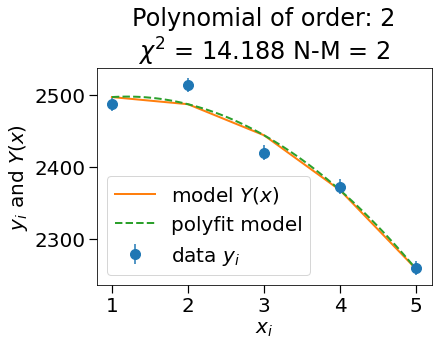

Fit parameters:
a[0] = 2397.77456 +/- 49.19350
a[1] = 146.68953 +/- 64.30335
a[2] = -57.33333 +/- 23.86719
a[3] = 4.51836 +/- 2.63523
polyval best-fit parameters:  [   4.51836139  -57.33332797  146.68952899 2397.77455583]
parameter uncertainties:  [  8.83812072  80.04652879 215.6625642  164.98667055]
Chi-square: 11.24818242066723


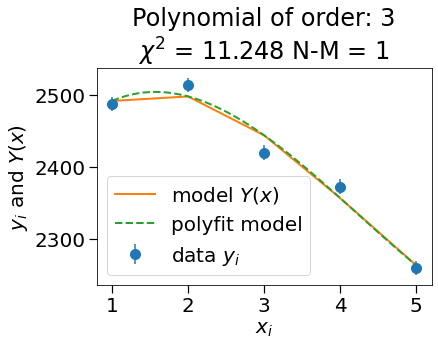

Fit parameters:
a[0] = 1892.69161 +/- 158.42980
a[1] = 1098.73079 +/- 291.05889
a[2] = -636.90932 +/- 174.45053
a[3] = 144.81918 +/- 41.91592
a[4] = -11.69173 +/- 3.48608


ValueError: the number of data points must exceed order to scale the covariance matrix

In [7]:

M = [2,3,4,5] #Setup M array to determine order of polynomial, i.e. M = 2 is order 1
for m in M:
    
    #Data from Dow Jones
    x = np.array([1,2,3,4,5]) #days
    y = np.array([2470.0,2510.0,2410.0,2350.0,2240.0]) #Dow Jones Average (DJA)
    N = len(x) 
    dy = 10*ones(N) #Standard deviation of data point, +- 10
    seed(0)           # Initialize random number generator
    y += normal(0,dy) # add simulated measurement errors (Gaussian distributed random vector)

    #* Fit the data to a straight line or a more general polynomial
    M = m
    if M == 2:  
        #* straight line fit
        [a_fit, sig_a, yy, chisqr] = linreg(x, y, dy)
    else: 
        #* Polynomial fit
        [a_fit, sig_a, yy, chisqr] = pollsf(x, y, dy, M)

    #* Print out the fit parameters, including their error bars.
    print('Fit parameters:')
    for i in range(M):
        print('a[%d] = %.5f +/- %.5f' % (i,a_fit[i],sig_a[i]))

    # Use built-in numpy function:
    deg = M - 1
    params, cov = polyfit(x,y,deg,w=1/dy,cov=True)
    dparams = sqrt( diag( cov ))
    print('polyval best-fit parameters: ', params)
    # variance in parameters from diagonal of covariance matrix:
    print('parameter uncertainties: ', dparams)
    print('Chi-square:', chisqr)


    # construct best-fitting model
    xmod = linspace(min(x),max(x),100)
    ymod = polyval(params,xmod)
    rcParams.update({'font.size': 20})
    #* Graph the data, with error bars, and fitting function.
    plt.figure()
    plt.errorbar(x,y,dy,fmt='o',ms=10,label='data $y_i$')   # Graph data with error bars
    plt.plot(x,yy,'-',lw=2,label='model $Y(x)$')            # Plot the fit on same graph as data
    plt.plot(xmod,ymod,'--',lw=2,label='polyfit model') # polyfit result
    #plt.title('Projectile Motion: ') + air_text)
    xlabel('$x_i$')  
    ylabel('$y_i$ and $Y(x)$')
    legend(loc='best')
    #speeds = r'$v_0$ = {0:.1f} '.format(speed)
    title('Polynomial of order: ' + str(M-1) + 
          '\n$\chi^2$ = ' + str(round(chisqr,3)) + ' N-M = ' + str(N-M))
    tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks
    plt.show()